In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
import seaborn as sns

from utils import (
    plot_lambdas,
    smooth_curve,
    FORMATTER,
    METHOD_COLORS,
)

sns.set_theme(style="white", rc={"grid.color": "lightgray"})
plt.rc("axes", titlesize=16, titleweight="bold", labelsize=14, labelweight="bold")
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
font = font_manager.FontProperties(weight='bold')

In [11]:
comps = [("Banana", 30), ("Chicken", 70), ("Gate", 100), ("total", 200)]
setups = ["Baseline", "Decq", "Drq", "Dylam"]
name_map = {
    "Baseline": "Q-Learning",
    "Decq": "Q-Decomp",
    "Drq": "DRQ",
    "Dylam": "DyLam",
}
for comp, max_rew in comps:
    reward = pd.read_csv(f"ChickenBanana/rew-{comp}.csv")
    for setup in setups:
        mean = reward[f"setup: {setup} - ep_info/{comp}"].values / max_rew
        minimum = reward[f"setup: {setup} - ep_info/{comp}__MIN"].values / max_rew
        maximum = reward[f"setup: {setup} - ep_info/{comp}__MAX"].values / max_rew
        mean = smooth_curve(mean)
        minimum = smooth_curve(minimum)
        maximum = smooth_curve(maximum)
        plt.plot(
            mean,
            label=name_map[setup],
            color=METHOD_COLORS[name_map[setup]],
        )
    plt.title(f"Chicken-Banana: {comp.title()} Reward")
    plt.xlabel("Number of training Episodes")
    plt.ylabel("Cumulative Episode Reward")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"ChickenBanana/reward-{comp.lower()}.pdf", format="pdf")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [3]:
lambdas = {
    x.replace(".csv", ""): pd.read_csv(f"ChickenBanana/lambda-{x}.csv")
    for x in ["Banana", "Chicken", "Gate"]
}
plot_lambdas("Chicken-Banana: Weights Development", lambdas, FORMATTER, 1, x_label="Number of training episodes")

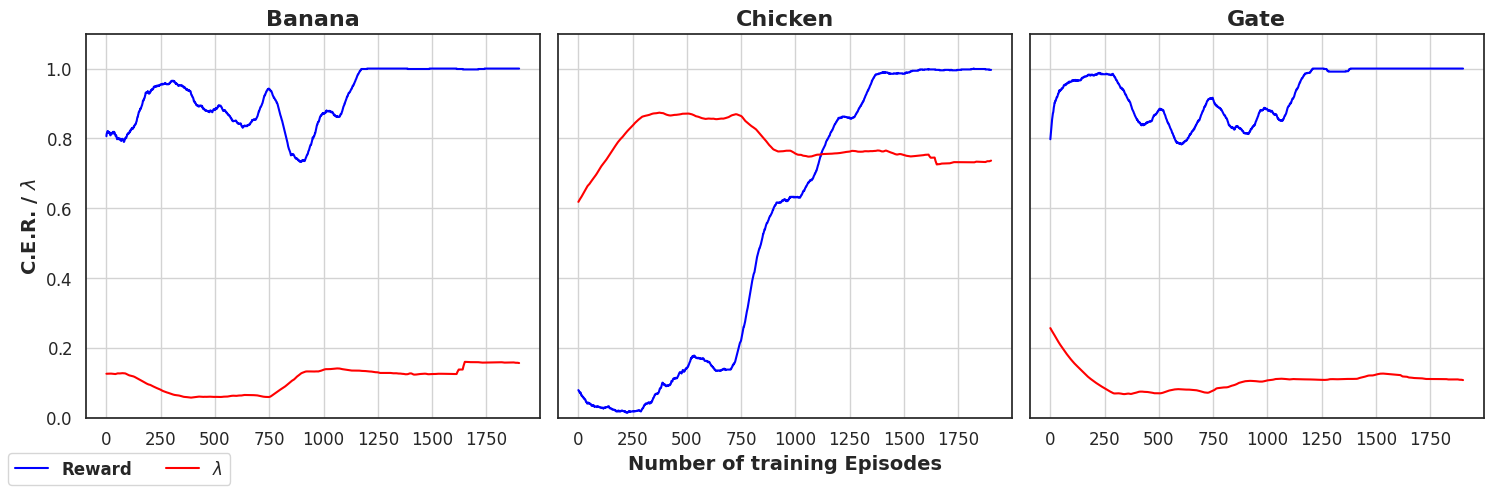

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)
for i, (comp, max_rew) in enumerate(comps[:-1]):
    reward = pd.read_csv(f"ChickenBanana/rew-{comp}.csv")
    mean = reward[f"setup: Dylam - ep_info/{comp}"] / max_rew
    minimum = reward[f"setup: Dylam - ep_info/{comp}__MIN"] / max_rew
    maximum = reward[f"setup: Dylam - ep_info/{comp}__MAX"] / max_rew
    mean = smooth_curve(mean.values)
    minimum = smooth_curve(minimum.values)
    maximum = smooth_curve(maximum.values)
    axs[i].plot(
        mean,
        label="Reward",
        color="blue",
    )
    
    lambda_ = lambdas[comp][f"setup: Dylam - lambdas/{comp}"].values[-len(mean):]
    axs[i].plot(
        lambda_,
        label="$\lambda$",
        color="red",
    )
    axs[i].set_title(f"{comp.title()}")
    axs[i].set_ylim(0, 1.1)
    axs[i].grid()
axs[0].set_ylabel("C.E.R. / $\lambda$")
axs[1].set_xlabel("Number of training Episodes")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower left", ncol=2, prop=font)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(FORMATTER)
plt.savefig("ChickenBanana/reward-lambda-dylam.pdf", format="pdf")